In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf

## Main Dataset

In [2]:
avocados = pd.read_csv("avocado-updated-1.csv", parse_dates=[0], dayfirst = True, infer_datetime_format = True)
avocados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
3,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,organic,2015,Baltimore/Washington
4,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,2020-11-22,1.09,22873.58,22.15,1196.15,3.44,21651.84,15930.81,5721.03,0.00,organic,2020,Richmond/Norfolk
11269,2020-11-29,1.49,14933.96,112.80,2805.64,28.16,11987.36,10984.74,1002.62,0.00,organic,2020,Charlotte
11270,2020-11-29,1.19,325928.47,8496.29,238481.65,230.96,78719.57,65676.32,9996.58,3046.67,conventional,2020,Hartford/Springfield
11271,2020-11-29,0.89,133331.19,35351.47,10999.30,24.30,86956.12,80411.60,5917.86,626.66,conventional,2020,Pittsburgh


In [3]:
avocados['date'] = pd.to_datetime(avocados['date'])
avocados['month'] = avocados['date'].apply(lambda x:x.month)
avocados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
2,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1
3,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,organic,2015,Baltimore/Washington,1
4,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,2020-11-22,1.09,22873.58,22.15,1196.15,3.44,21651.84,15930.81,5721.03,0.00,organic,2020,Richmond/Norfolk,11
11269,2020-11-29,1.49,14933.96,112.80,2805.64,28.16,11987.36,10984.74,1002.62,0.00,organic,2020,Charlotte,11
11270,2020-11-29,1.19,325928.47,8496.29,238481.65,230.96,78719.57,65676.32,9996.58,3046.67,conventional,2020,Hartford/Springfield,11
11271,2020-11-29,0.89,133331.19,35351.47,10999.30,24.30,86956.12,80411.60,5917.86,626.66,conventional,2020,Pittsburgh,11


## Trend of Consumption of Various Fruits from 1980 to 2016

In [4]:
fruitss = pd.read_csv('Fresh fruits_total revenue_global comparison.csv')

#Revenue comparison in million USD (US$), convert the data frame into integers
fruitss

,Countries,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,Albania,355,374,326,346,376,432,443,522,595,595,625,674,719,765
1,Algeria,1090,1171,1029,1030,1097,1111,1099,1016,1031,1030,1058,1019,1020,1015
2,Angola,1563,1977,1872,1730,2129,1738,1554,1231,1321,1229,1316,1432,1574,1703
3,Argentina,3171,2884,3297,2826,3287,2577,2150,2422,2551,2422,2474,2547,2590,2653
4,Armenia,323,332,275,269,309,332,381,412,415,441,469,502,539,578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Uruguay,833,818,747,718,809,792,746,796,727,719,721,736,750,777
147,Uzbekistan,615,686,744,761,515,415,468,473,469,534,588,652,715,783
148,Vietnam,3381,3693,3914,4134,4465,4813,5208,6345,6812,6967,7387,7886,8327,8808
149,Zambia,480,466,354,355,401,390,390,305,311,267,265,271,282,294


In [5]:
US = fruitss.loc[fruitss.loc[:, 'Countries'] == 'United States']
US_revenue = US.loc[:, '2013':'2026'].astype(int)
US_revenue

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
145,45755,47689,48933,49932,51693,53229,54669,61146,63289,61801,62584,63627,65651,67582


In [6]:
US_revenue_pct_change = US_revenue.pct_change(axis = 'columns')
US_revenue_pct_change

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
145,NaN,0.042269,0.026086,0.020416,0.035268,0.029714,0.027053,0.118477,0.035047,-0.023511,0.01267,0.016666,0.03181,0.029413


In [7]:
x_axis = np.arange(2013,2027)
x_axis

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026])

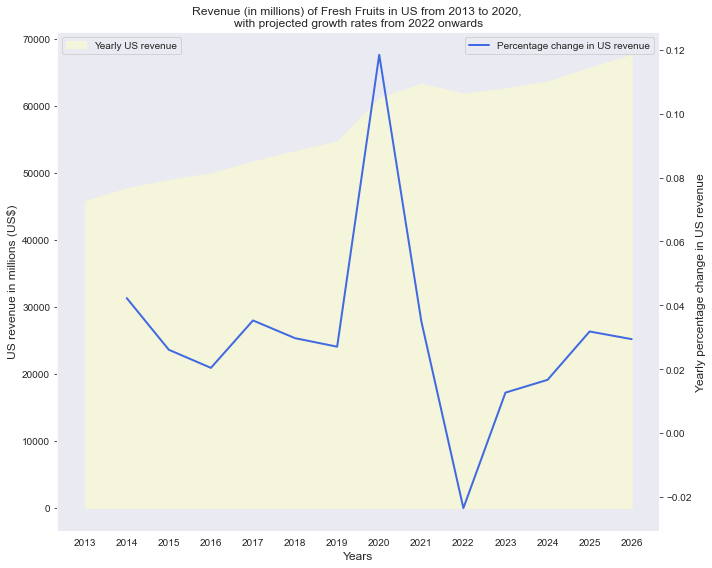

In [8]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize = (10, 8))
#note: iloc to change the shape of dataframe from (1,14) to (14)
fill_between1 = ax.fill_between(x_axis, US_revenue.iloc[0,:], label = 'Yearly US revenue', color = 'beige')
ax1 = ax.twinx()

line1 = ax1.plot(x_axis, US_revenue_pct_change.iloc[0,:], label = 'Percentage change in US revenue', linewidth = 2, color = 'royalblue')

ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('US revenue in millions (US$)', fontsize = 12)
ax1.set_ylabel('Yearly percentage change in US revenue', fontsize = 12)
ax.set_title('Revenue (in millions) of Fresh Fruits in US from 2013 to 2020, \nwith projected growth rates from 2022 onwards', fontsize = 12)
ax1.legend(loc = 1)
ax.legend(loc = 2)

ax.set_xticks(x_axis)
fig.tight_layout()
plt.show()

## Preliminary Analysis

In [9]:
fruits = pd.read_csv('Week 19 - Fresh Fruit Consumption in the US - 1980 to 2016 (1).csv')

fruits['Pounds Consumed Per Capita'].astype(float)

print(fruits['Fruit'].unique())

apricots = fruits.loc[fruits.loc[:, 'Fruit'] == 'Apricots']
avocado = fruits.loc[fruits.loc[:, 'Fruit'] == 'Avocados']
blueberries = fruits.loc[fruits.loc[:, 'Fruit'] == 'Blueberries']
cherries = fruits.loc[fruits.loc[:, 'Fruit'] == 'Cherries']
cranberries = fruits.loc[fruits.loc[:, 'Fruit'] == 'Cranberries']
grapefruit = fruits.loc[fruits.loc[:, 'Fruit'] == 'Grapefruit']
kiwifruit = fruits.loc[fruits.loc[:, 'Fruit'] == 'Kiwifruit']
lemons = fruits.loc[fruits.loc[:, 'Fruit'] == 'Lemons']
limes = fruits.loc[fruits.loc[:, 'Fruit'] == 'Limes']
mangoes = fruits.loc[fruits.loc[:, 'Fruit'] == 'Mangoes']
oranges = fruits.loc[fruits.loc[:, 'Fruit'] == 'Oranges']
strawberries = fruits.loc[fruits.loc[:, 'Fruit'] == 'Strawberries']
papayas = fruits.loc[fruits.loc[:, 'Fruit'] == 'Papayas']
peaches_nectarines = fruits.loc[fruits.loc[:, 'Fruit'] == 'Peaches & Nectarines']
pears = fruits.loc[fruits.loc[:, 'Fruit'] == 'Pears']
plums_prunes = fruits.loc[fruits.loc[:, 'Fruit'] == 'Plums and Prunes']
tangerines = fruits.loc[fruits.loc[:, 'Fruit'] == 'Tangerines']

['Apricots' 'Avocados' 'Blueberries' 'Cherries' 'Cranberries' 'Grapefruit'
 'Kiwifruit' 'Lemons' 'Limes' 'Mangoes' 'Oranges' 'Papayas'
 'Peaches & Nectarines' 'Pears' 'Plums and Prunes' 'Tangerines'
 'Strawberries']


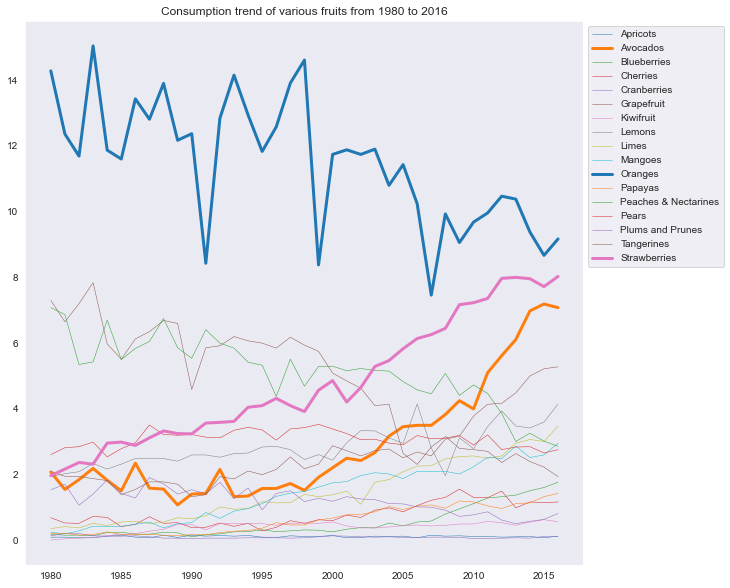

In [10]:
x = np.arange(1980, 2017)
fruit = [apricots, avocado, blueberries, cherries, cranberries, grapefruit, kiwifruit, lemons, limes, mangoes, oranges, papayas, peaches_nectarines, pears, plums_prunes, tangerines, strawberries]
plt.figure(figsize = (10, 10))

for item in fruit:
    if (item is oranges) or (item is strawberries) or (item is avocado):
        plt.plot(x, item['Pounds Consumed Per Capita'], label = str(item.iloc[0,0]), linewidth = 3)
        plt.legend(bbox_to_anchor = (1.0, 1.0), fontsize = 10)
        
    else:
        plt.plot(x, item['Pounds Consumed Per Capita'], label = str(item.iloc[0,0]), linewidth = 0.5)
        plt.legend(bbox_to_anchor = (1.0, 1.0), fontsize = 10)
        
plt.title('Consumption trend of various fruits from 1980 to 2016', fontsize = 12)
plt.show()

## Revenue vs Year

In [11]:
avocados['revenue'] = avocados['average_price'].astype(float) * avocados['total_volume'].astype(float)
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,revenue
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,49865.4016
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,435021.4900
2,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,851067.0648
3,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington,1,24687.0912
4,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,1,80834.6632


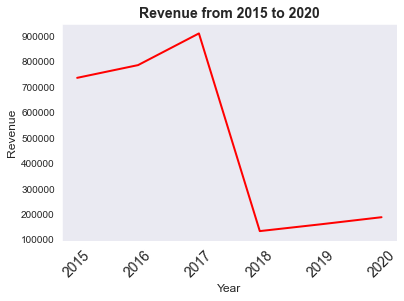

In [12]:
years = avocados['year'].unique()
rev_dict = {}
for year in years:
    rev_dict[year] = avocados[avocados['year'] == year]['revenue'].mean()
    
    
plt.plot(years, rev_dict.values(),linewidth=2, color='r')
plt.xlabel('Year', fontsize=12)
plt.xticks(years, fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue from 2015 to 2020', fontsize=14,fontweight="bold")
plt.show()

## Revenue vs Month

In [13]:
months = np.arange(1,13,1)
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'Ocotober', 'November', 'December']
years = avocados['year'].unique()
data_dict = {}

for year in years:
    year_rev = []
    for month in months: 
        year_rev.append(avocados[(avocados['year']==year) & (avocados['month']==month)]['revenue'].mean())
    data_dict[year] = year_rev

df = pd.DataFrame(data_dict)
df['month'] = month_lst
df.set_index('month')

,2015,2016,2017,2018,2019,2020
month,,,,,,
January,690143.777183,722443.964725,8.434581e+05,94058.693983,138921.956864,152939.097850
February,753236.904910,760092.356776,8.694957e+05,106059.335640,92777.888206,213318.893676
March,743174.059551,740846.891467,8.827733e+05,144122.965642,301178.987556,217530.491677
April,768669.905263,744656.680423,9.556601e+05,113070.252772,118130.135750,135356.823556
May,846934.859617,813582.845329,1.032527e+06,92848.648700,156451.525016,178607.806443
June,828356.435352,841829.811843,1.047196e+06,129661.132278,273275.095020,246832.644825
July,823747.064747,872702.566792,1.006325e+06,165914.308796,179234.867314,115701.379745
August,774227.116635,852469.715376,9.437973e+05,232986.455576,182275.932295,168946.761090
September,745064.232983,875794.187552,2.364686e+05,135210.366684,155764.253821,227167.812632


In [14]:
months = np.arange(1,13,1)
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'Ocotober', 'November', 'December']
years = avocados['year'].unique()
data_dict = {}

for year in years:
    year_rev = []
    for month in months: 
        year_rev.append(avocados[(avocados['year']==year) & (avocados['month']==month)]['revenue'].mean())
    data_dict[year] = year_rev

df = pd.DataFrame(data_dict)
df['month'] = month_lst
df['mean'] = df.mean(axis=1)
df

,2015,2016,2017,2018,2019,2020,month,mean
0,690143.777183,722443.964725,8.434581e+05,94058.693983,138921.956864,152939.097850,January,440327.603790
1,753236.904910,760092.356776,8.694957e+05,106059.335640,92777.888206,213318.893676,February,465830.175825
2,743174.059551,740846.891467,8.827733e+05,144122.965642,301178.987556,217530.491677,March,504937.780721
3,768669.905263,744656.680423,9.556601e+05,113070.252772,118130.135750,135356.823556,April,472590.644942
4,846934.859617,813582.845329,1.032527e+06,92848.648700,156451.525016,178607.806443,May,520158.842212
5,828356.435352,841829.811843,1.047196e+06,129661.132278,273275.095020,246832.644825,June,561191.918111
6,823747.064747,872702.566792,1.006325e+06,165914.308796,179234.867314,115701.379745,July,527270.798654
7,774227.116635,852469.715376,9.437973e+05,232986.455576,182275.932295,168946.761090,August,525783.881636
8,745064.232983,875794.187552,2.364686e+05,135210.366684,155764.253821,227167.812632,September,395911.576727
9,668247.057938,783537.353978,1.862518e+05,135989.059748,155469.970289,172290.843696,Ocotober,350297.680096


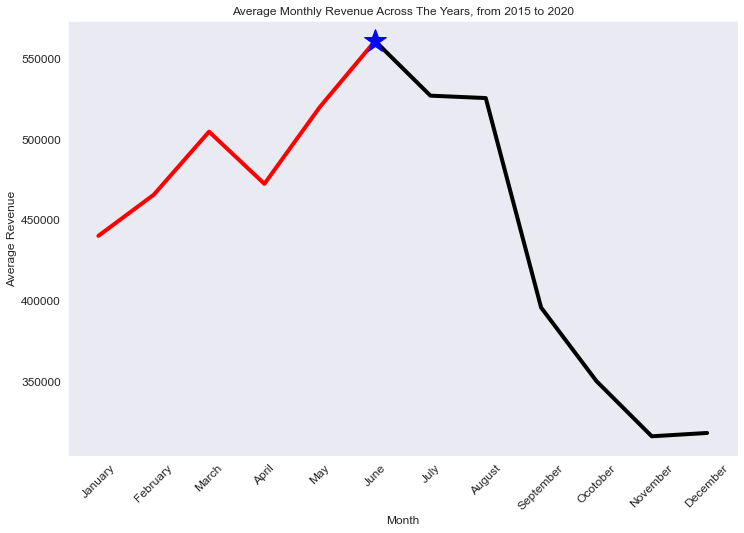

In [15]:
first_half = df[0:6]
second_half = df[5:]
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(first_half['month'], first_half['mean'], color='r', linewidth=4)
plt.plot(second_half['month'], second_half['mean'], color='black', linewidth=4)
maxi = df['mean'].max()
maxi_month = df[df['mean']==df['mean'].max()]['month']
plt.plot(maxi_month, maxi, marker='*', color='blue', markersize=24)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.title('Average Monthly Revenue Across The Years, from 2015 to 2020', fontsize=12)

plt.show()

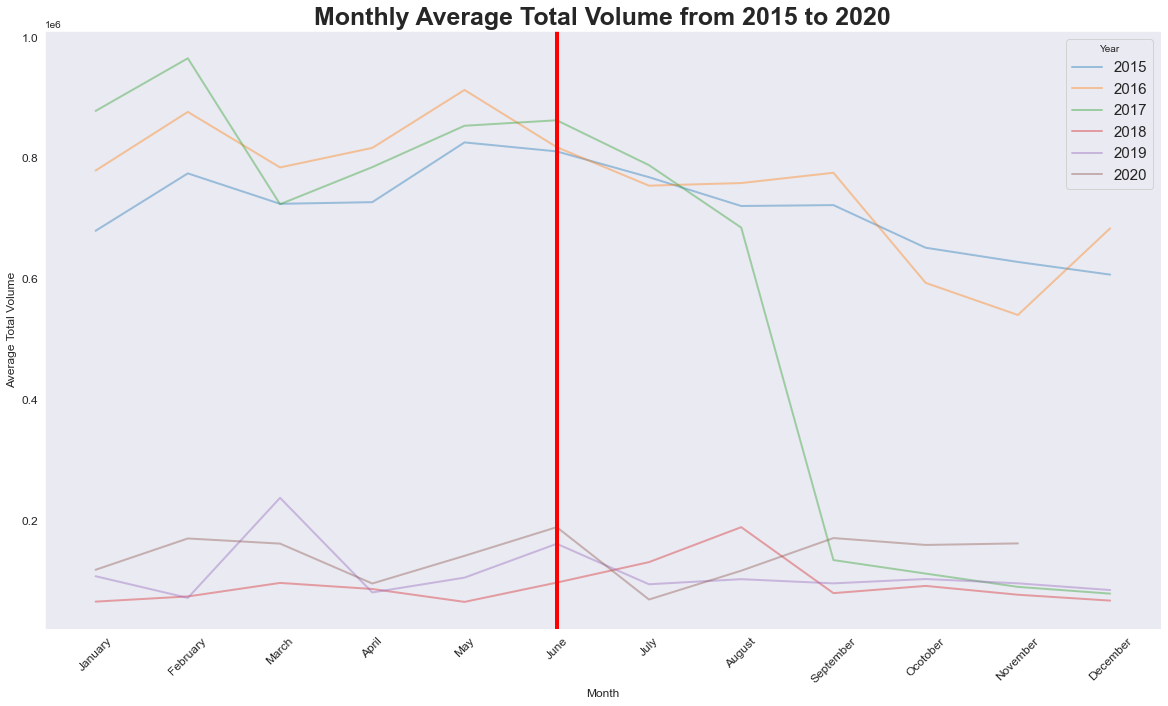

In [16]:
months = np.arange(1,13,1)
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'Ocotober', 'November', 'December']
years = avocados['year'].unique()
plt.rcParams["figure.figsize"] = (20,11)
for year in years:
    year_rev = []
    for month in months: 
        year_rev.append(avocados[(avocados['year']==year) & (avocados['month']==month)]['total_volume'].mean())
    plt.plot(months, year_rev, label=year, alpha=0.4, linewidth=2)

plt.axvline(x=6, color='red', linewidth=4)   
plt.xticks(months, month_lst, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Total Volume', fontsize=12)
plt.title('Monthly Average Total Volume from 2015 to 2020', fontsize=25, fontweight = 'bold')
plt.legend(title='Year', fontsize=15)
plt.show()

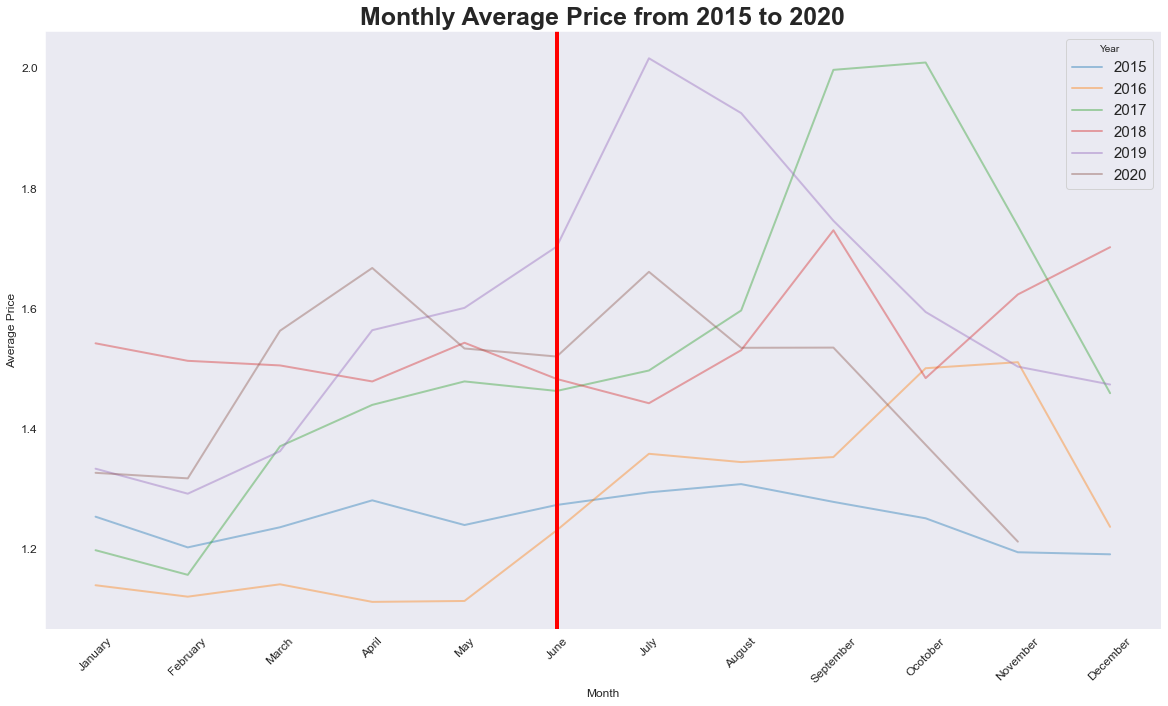

In [17]:
months = np.arange(1,13,1)
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'Ocotober', 'November', 'December']
years = avocados['year'].unique()
plt.rcParams["figure.figsize"] = (20,11)
for year in years:
    year_rev = []
    for month in months: 
        year_rev.append(avocados[(avocados['year']==year) & (avocados['month']==month)]['average_price'].mean())
    plt.plot(months, year_rev, label=year,alpha=0.4, linewidth=2)

plt.axvline(x=6, color='red', linewidth=4)
plt.xticks(months, month_lst, rotation=45, fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Monthly Average Price from 2015 to 2020', fontsize=25, fontweight = 'bold')
plt.legend(title='Year', fontsize=15)
plt.show()

## Revenue vs Season

In [18]:
revenue_by_month = avocados.groupby('month').revenue.mean()
revenue_by_month

month
1     721117.061519
2     753302.220756
3     747854.396846
4     777312.806748
5     816781.526438
6     845196.812340
7     860502.684388
8     793582.380184
9     694595.265692
10    649085.289085
11    575392.064178
12    568808.196546
Name: revenue, dtype: float64

In [19]:
total_revenue_spring = 0
total_revenue_summer = 0
total_revenue_autumn = 0
total_revenue_winter = 0

for month in revenue_by_month.index:
    if month == 1 or month == 2 or month == 3:
         total_revenue_winter += revenue_by_month[month];
    elif month == 4 or month == 5 or month == 6:
        total_revenue_spring += revenue_by_month[month];
    elif month == 7 or month == 8 or month == 9:
        total_revenue_summer += revenue_by_month[month];
    else: 
         total_revenue_autumn += revenue_by_month[month];
            
print(total_revenue_spring)
print(total_revenue_summer)
print(total_revenue_autumn)
print(total_revenue_winter)

season_data = {
    'Season': ['Winter', 'Summer', 'Spring', 'Autumn'], 
    'Revenue': [round(total_revenue_winter/3e6, 2),
                round(total_revenue_summer/3e6, 2),
                round(total_revenue_spring/3e6, 2), 
                round(total_revenue_autumn/3e6, 2), 
                ]
}

season_df = pd.DataFrame(season_data);

print(season_df)

2439291.1455264566
2348680.3302640575
1793285.5498089083
2222273.6791214147
   Season  Revenue
0  Winter     0.74
1  Summer     0.78
2  Spring     0.81
3  Autumn     0.60


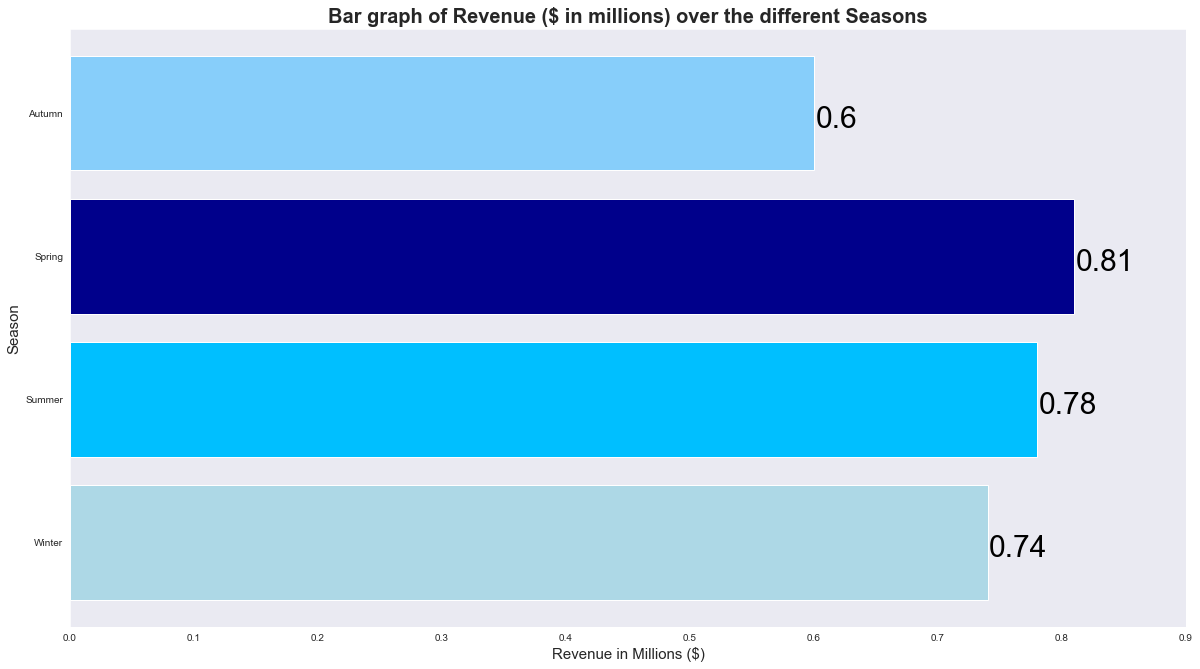

In [20]:
total_revenue = [round(total_revenue_winter/3e6, 2),
                 round(total_revenue_summer/3e6, 2),
                 round(total_revenue_spring/3e6, 2), 
                 round(total_revenue_autumn/3e6, 2), 
                ]

plt.barh(season_df.Season, season_df.Revenue, color=['lightblue', 'deepskyblue', 'darkblue', 'lightskyblue'])                  

plt.ylabel('Season', fontsize = 15)                     
plt.xlabel('Revenue in Millions ($)', fontsize = 15)
plt.xlim(0, 0.9)
plt.title('Bar graph of Revenue ($ in millions) over the different Seasons', fontsize=20, fontweight = 'bold')

for i, v in enumerate(total_revenue):
    plt.text(v + 0.001, i - .1, str(v), color='black', fontsize = 30)
    
plt.show()

## Revenue vs Type

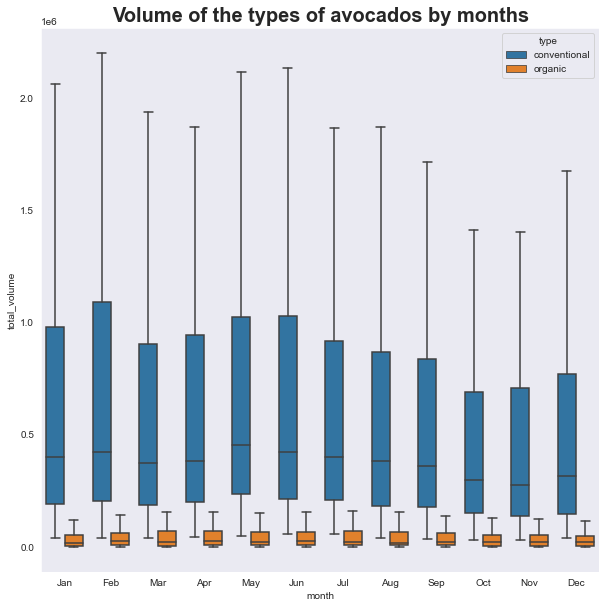

In [21]:
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(10)

x_1 = 'month'
y_2 = 'total_volume'

months = np.arange(0,12,1)
monthlst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

ax = sns.boxplot(x=x_1, y=y_2, data=avocados,hue='type',sym='')
ax.set_title('Volume of the types of avocados by months', fontsize = 20, fontweight = 'bold')
plt.xticks(months, monthlst)
plt.show()

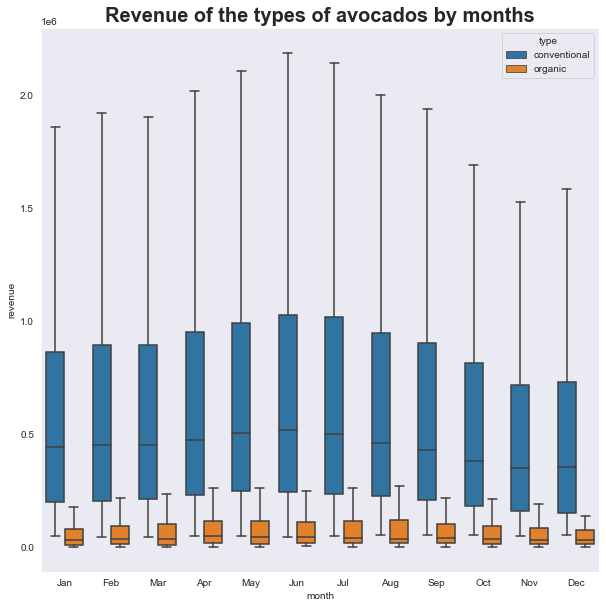

In [22]:
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(10)

x_1 = 'month'
y_1 = 'revenue'

months = np.arange(0,12,1)
monthlst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

ax = sns.boxplot(x=x_1, y=y_1, data=avocados,hue='type',sym='')
ax.set_title('Revenue of the types of avocados by months', fontsize = 20, fontweight = 'bold')
plt.xticks(months, monthlst)
plt.show()

In [23]:
avocados["season"] = (avocados["date"].dt.month - 1) // 3

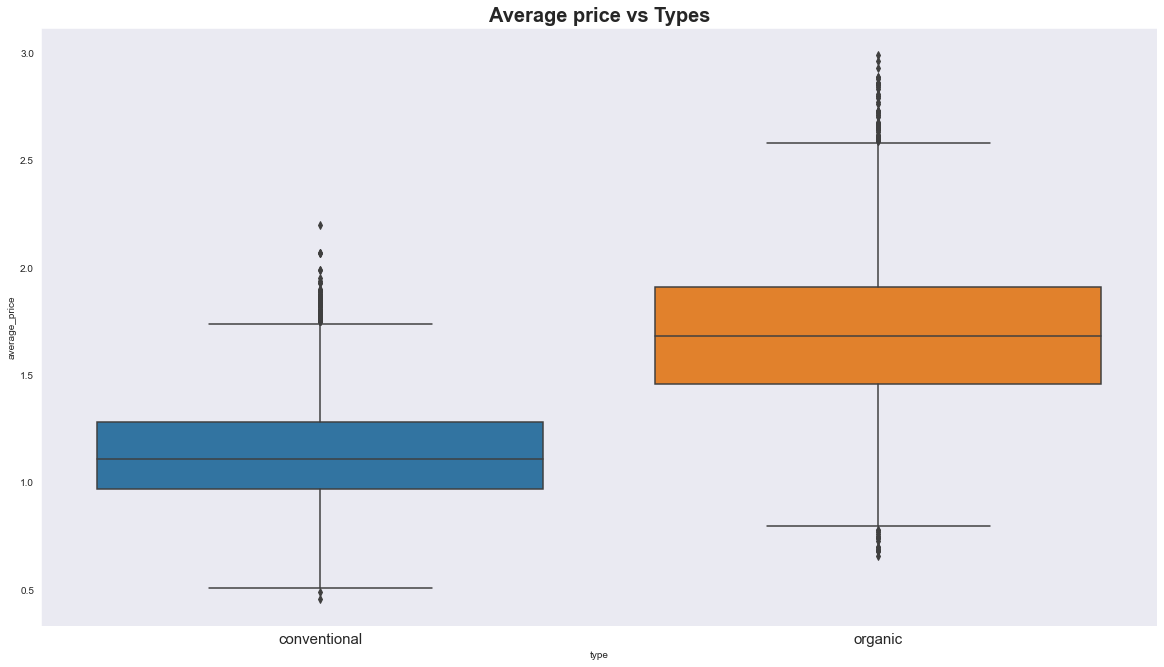

In [24]:
x = 'type'
y = 'average_price'

fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.boxplot(x=x, y=y, data=avocados)
ax.set_title('Average price vs Types', fontweight='bold', fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

## Revenue vs Regions

In [25]:
#slicing out relevant data
avocados_cut = avocados.loc[:, ['date', 'revenue', 'geography']]

overall_regions = ['Plains', 'Southeast', 'West', 'South Central', 'Northeast', 'Midsouth', 'California', 'Great Lakes']

selection = avocados_cut.loc[:, 'geography'].isin(overall_regions)

#slicing out data of the respective regions only
avocados_byregion = avocados_cut[selection]
avocados_byregion2 = avocados_byregion.copy()

avocados_byregion2

,date,revenue,geography
7,2015-01-04,5.372921e+06,California
8,2015-01-04,1.765137e+05,California
19,2015-01-04,3.450456e+06,Great Lakes
30,2015-01-04,2.836103e+06,Midsouth
31,2015-01-04,9.058195e+04,Midsouth
...,...,...,...
11254,2020-11-15,5.518254e+05,California
11258,2020-11-15,8.114651e+04,Plains
11260,2020-11-15,1.987314e+05,Southeast
11264,2020-11-22,3.326646e+05,Midsouth


In [26]:
#add columns for month
avocados_byregion2['month'] = [i.month for i in avocados_byregion2['date']]

# First grouping based on "geography"
# within each geography group we re grouping based on months
avocados_byregion_month = avocados_byregion2.groupby(['month', 'geography']).mean()

avocados_byregion_month

revenue
month geography                  
1     California     3.629308e+06
      Great Lakes    2.749957e+06
      Midsouth       1.664108e+06
      Northeast      2.455128e+06
      Plains         8.743773e+05
...                           ...
12    Northeast      1.793570e+06
      Plains         7.418302e+05
      South Central  3.527541e+06
      Southeast      1.412185e+06
      West           2.533726e+06

[96 rows x 1 columns]

In [27]:
heatmap_data_byregions = avocados_byregion_month.unstack(level=0)
heatmap_data_byregions

revenue                                            \
month                    1             2             3             4    
geography                                                               
California     3.629308e+06  3.336375e+06  3.917798e+06  4.074736e+06   
Great Lakes    2.749957e+06  2.647170e+06  2.579689e+06  2.652835e+06   
Midsouth       1.664108e+06  1.765106e+06  1.749651e+06  1.881821e+06   
Northeast      2.455128e+06  2.710980e+06  2.275431e+06  2.843177e+06   
Plains         8.743773e+05  8.390073e+05  8.993899e+05  9.569792e+05   
South Central  3.476873e+06  3.532728e+06  3.933983e+06  3.153449e+06   
Southeast      1.837671e+06  1.885691e+06  1.809914e+06  1.774396e+06   
West           2.969212e+06  2.999499e+06  3.059995e+06  3.116220e+06   

                                                                       \
month                    5             6             7             8    
geography                                                               
California     4.598338e+06  3.646581e+06  4.240544e+06  3.893384e+06   
Great Lakes    2.417103e+06  2.265672e+06  2.589175e+06  1.847629e+06   
Midsouth       1.876622e+06  1.958785e+06  1.930835e+06  1.850718e+06   
Northeast      3.158914e+06  3.228901e+06  2.769642e+06  2.674941e+06   
Plains         9.920788e+05  1.054730e+06  1.087554e+06  9.171450e+05   
South Central  3.933905e+06  4.676599e+06  5.413545e+06  4.322358e+06   
Southeast      1.992722e+06  2.113300e+06  1.978133e+06  1.836576e+06   
West           3.327136e+06  3.400756e+06  3.255937e+06  3.041149e+06   

                                                                       
month                    9             10            11            12  
geography                                                              
California     3.199588e+06  2.777335e+06  2.863087e+06  2.331382e+06  
Great Lakes    1.993357e+06  2.044742e+06  1.974368e+06  2.050099e+06  
Midsouth       1.713549e+06  1.594623e+06  1.264300e+06  1.213564e+06  
Northeast      2.137517e+06  2.074761e+06  1.789890e+06  1.793570e+06  
Plains         7.937981e+05  7.365020e+05  5.864286e+05  7.418302e+05  
South Central  4.439875e+06  3.838019e+06  3.320494e+06  3.527541e+06  
Southeast      1.583788e+06  1.684220e+06  1.388481e+06  1.412185e+06  
West           2.615598e+06  2.559091e+06  2.396290e+06  2.533726e+06

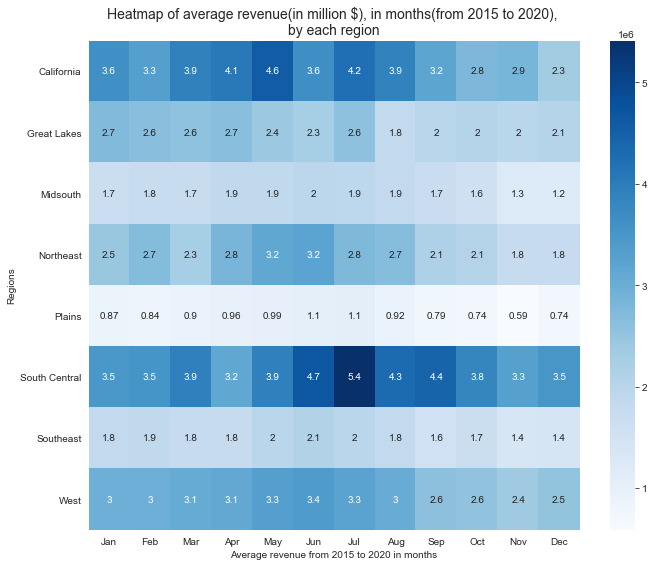

In [28]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(11, 9))

plt.title('Heatmap of average revenue(in million $), in months(from 2015 to 2020), \nby each region', fontsize = 14)
revenue_scaled = heatmap_data_byregions/1000000
sns.heatmap(heatmap_data_byregions, annot = revenue_scaled, xticklabels = labels, cmap = "Blues")
plt.xlabel('Average revenue from 2015 to 2020 in months' )
plt.ylabel('Regions')
plt.show()

## Revenue vs Regions, Type and Grade

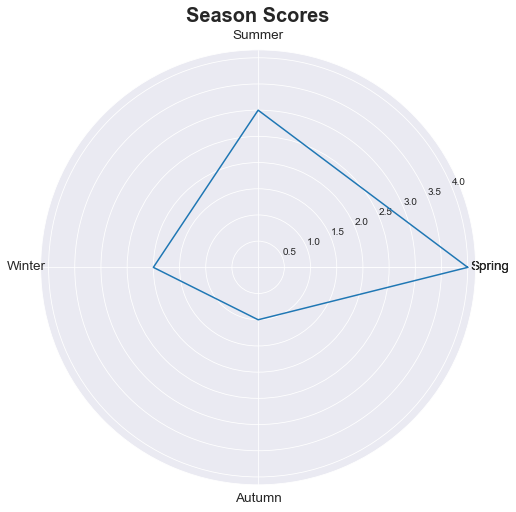

In [29]:
sns.set_style('dark')
variables1 = ['Spring', 'Summer', 'Winter', 'Autumn']
variables1 = [*variables1, variables1[0]]

x_3 = [4, 3, 2, 1]
x_3 = [*x_3, x_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(x_3))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, x_3)

plt.title('Season Scores', size=20, y=1.05, fontweight="bold")
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=variables1, fontsize=13.5)
plt.show()

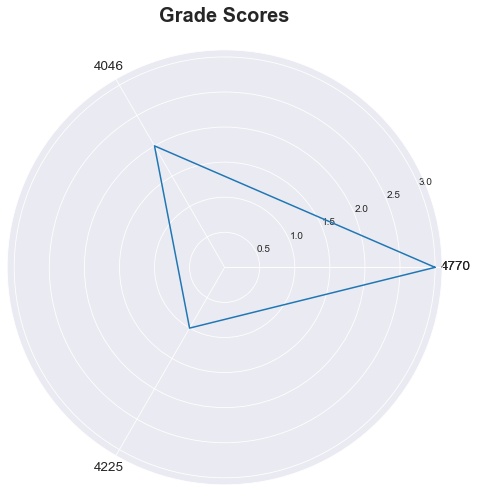

In [30]:
variables2 = ['4770', '4046', '4225']
variables2 = [*variables2, variables2[0]]

x_4 = [3, 2, 1]
x_4 = [*x_4, x_4[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(x_4))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, x_4)

plt.title('Grade Scores', size=20, y=1.05, fontweight="bold")
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=variables2, fontsize=13.5)
plt.show()

Text(0.5, 0, 'Type of Avocado')

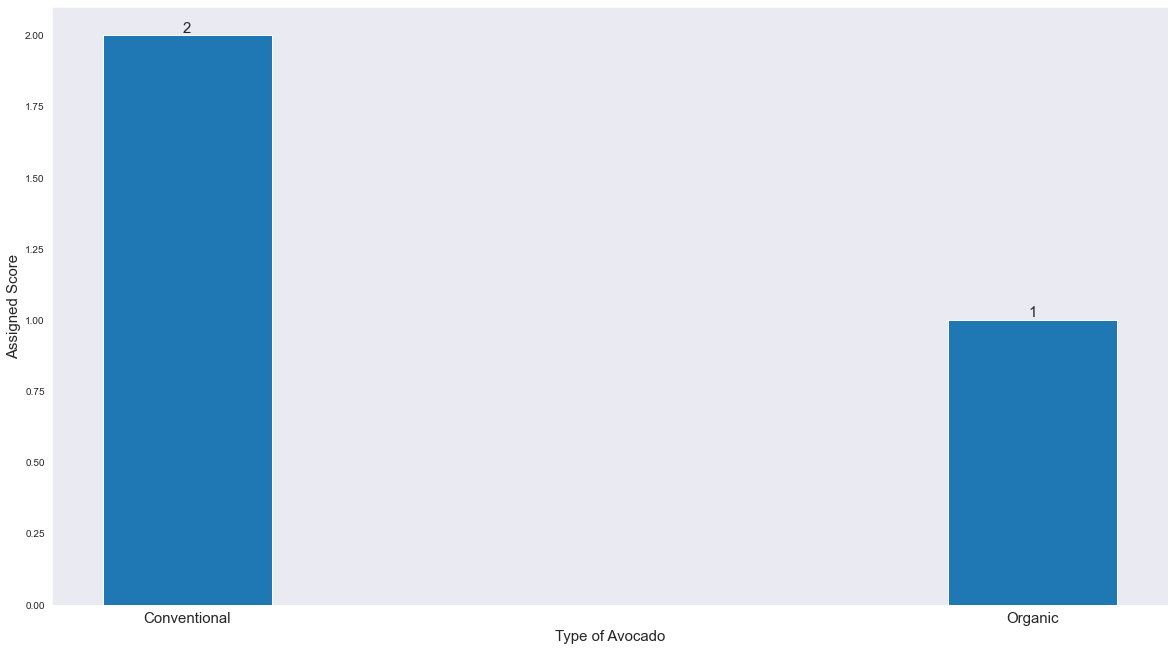

In [31]:
type_s = ['Conventional', 'Organic']
type_s_length = np.arange(len(type_s))
values = [2, 1]
plt.bar(type_s_length, values, width = 0.2)
plt.xticks(ticks = type_s_length, labels = type_s, fontsize = 15)
for i in range(len(type_s)):
    plt.text(x = i, y = values[i], s = values[i], ha='center', va='bottom', fontsize=15)

plt.ylabel('Assigned Score', fontsize = 15)
plt.xlabel('Type of Avocado', fontsize = 15)

## Scoring System

In [32]:
plains = ['St. Louis']
ne = ['Albany', 'Boston', 'Buffalo/Rochester', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Northern New England', 'New York', 'Philadelphia', 'Pittsburgh', 'Syracuse']
west = ['Boise', 'Denver', 'Las Vegas', 'Phoenix/Tucson', 'Portland', 'Salt Lake City', 'Seattle', 'Spokane', 'West Tex/New Mexico']
ms = ['Baltimore/Washington', 'Charlotte', 'Louisville', 'Nashville', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke']
cali = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
gl = ['Chicago', 'Cincinnati/Dayton', 'Columbus', 'Detroit', 'Grand Rapids', 'Indianapolis']
se = ['Atlanta', 'Jacksonville', 'Miami/Ft. Lauderdale', 'Orlando', 'South Carolina', 'Tampa']
sc = ['Dallas/Ft. Worth', 'Houston', 'New Orleans/Mobile']

In [33]:
winter = [1, 2, 3]
spring = [4, 5, 6]
summer = [7, 8, 9]
autumn = [10, 11, 12]

In [34]:
def season(season):
    is_season = avocados.loc[:, 'month'].isin(season)
    new = avocados.loc[is_season]
    new1 = new.loc[:, ['revenue', 'month']]
    return new1

In [35]:
wint = season(winter)
summ = season(summer)
spri = season(spring)
aut = season(autumn)

revenue = [wint, summ, spri, aut]
mean_season_revenue = []

for i in revenue:
    mean_season_revenue.append(round(i['revenue'].mean()/1e6, 3))
    
mean_season_revenue

[0.74, 0.795, 0.812, 0.599]

In [36]:
def grade(grade):
    return round(((avocados[grade] * avocados['average_price']).mean())/1e6, 3)

grade_4046 = grade('4046')
grade_4770 = grade('4770')
grade_4225 = grade('4225')

grades = [grade_4046, grade_4770, grade_4225]
grades

[0.236, 0.022, 0.28]

In [37]:
def typ(typ):
    is_type = avocados.loc[:, 'type'] == typ
    new = avocados.loc[is_type]
    new1 = new.loc[:, ['revenue', 'type']]
    return new1

In [38]:
conventional = typ('conventional')
organic = typ('organic')

In [39]:
types = [conventional, organic]
mean_type_revenue = []

for i in types:
    mean_type_revenue.append(round(i['revenue'].mean()/1e6, 3))

mean_type_revenue

[1.074, 0.083]

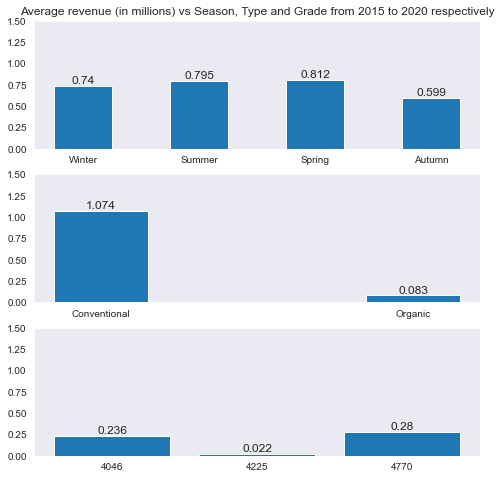

In [40]:
label = ['Winter', 'Summer', 'Spring', 'Autumn']
aa = np.arange(len(label))
width = 0.5

fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8, 8))
ax1.bar(aa, mean_season_revenue, width = width)
ax1.set_xticks(aa)
ax1.set_xticklabels(label)
ax1.set_ylim(0, 1.5)
ax1.set_title('Average revenue (in millions) vs Season, Type and Grade from 2015 to 2020 respectively', fontsize = 12)
for i in range(len(label)):
    ax1.text(x = i, y = mean_season_revenue[i], s = mean_season_revenue[i], ha='center', va='bottom', fontsize=12)

y = ['Conventional', 'Organic']
y1 = np.arange(len(y))
ax2.bar(y, mean_type_revenue, width = 0.3)
ax2.set_xticks(y1)
ax2.set_xticklabels(y)
for j in range(len(y)):
    ax2.text(x = j, y = mean_type_revenue[j], s = mean_type_revenue[j], ha='center', va='bottom', fontsize=12)

z = ['4046', '4225', '4770']
z1 = np.arange(len(z))
ax3.bar(z, grades)
ax3.set_xticks(z1)
ax3.set_xticklabels(z)
for k in range(len(z)):
    ax3.text(x = k, y = grades[k], s = grades[k], ha='center', va='bottom', fontsize=12)

In [41]:
def region_data(region):
    is_region = avocados.loc[:, 'geography'].isin(region)
    new = avocados.loc[is_region]
    new1 = new.loc[:, ['type', 'month', 'revenue', '4046', '4225', '4770', 'average_price']]
    return new1

plains_data = region_data(plains)
ne_data = region_data(ne)
west_data = region_data(west)
ms_data = region_data(ms)
cali_data = region_data(cali)
gl_data = region_data(gl)
se_data = region_data(se)
sc_data = region_data(sc)

In [42]:
land = pd.read_csv('US Regions Land Size.csv')

plains_area = land['Land Area'][0]
ne_area = land.loc[1:10, 'Land Area'].sum()
west_area = land.loc[11:19, 'Land Area'].sum()
ms_area = land.loc[20:26, 'Land Area'].sum()
cali_area = land.loc[27:30, 'Land Area'].sum()
gl_area = land.loc[31:36, 'Land Area'].sum()
se_area = land.loc[37:42, 'Land Area'].sum()
sc_area = land.loc[43:, 'Land Area'].sum()

## Plains

In [43]:
def plains_season(season):
    is_season = plains_data.loc[:, 'month'].isin(season)
    new = plains_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ plains_area, 2)
    return new1

In [44]:
plains_revenue_4046 = round((plains_data['average_price'] * plains_data['4046']).mean()/plains_area, 3)
plains_revenue_4225 = round((plains_data['average_price'] * plains_data['4225']).mean()/plains_area, 3)
plains_revenue_4770 = round((plains_data['average_price'] * plains_data['4770']).mean()/plains_area, 4)

In [45]:
def plains_type(typ):
    is_typ = plains_data.loc[:, 'type'] == typ
    new = plains_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/plains_area, 2)
    return new1

In [46]:
conventional_revenue_plains = plains_type('conventional')
organic_revenue_plains = plains_type('organic')

In [47]:
type_revenue_plains= [conventional_revenue_plains, organic_revenue_plains]
season_revenue_plains = [plains_season(winter), plains_season(summer), plains_season(spring), plains_season(autumn)]
grade_revenue_plains = [plains_revenue_4046, plains_revenue_4225, plains_revenue_4770]

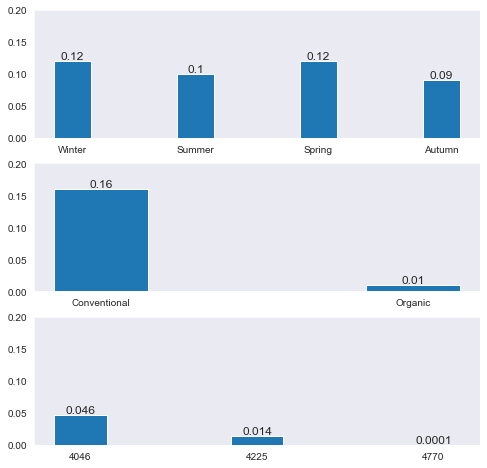

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8, 8))

sns.set_style("darkgrid")
a = ['Winter', 'Summer', 'Spring', 'Autumn']
a1 = np.arange(len(a))
ax1.bar(a1, season_revenue_plains, width = 0.3)
ax1.set_xticks(a1)
ax1.set_ylim(0, 0.2)
ax1.set_xticklabels(a)
for i in range(len(a)):
    ax1.text(x = i, y = season_revenue_plains[i], s = season_revenue_plains[i], ha='center', va='bottom', fontsize=12)

b = ['Conventional', 'Organic']
b1 = np.arange(len(b))
ax2.bar(b1, type_revenue_plains, width = 0.3)
ax2.set_xticks(b1)
ax2.set_xticklabels(b)
for i in range(len(b)):
    ax2.text(x = i, y = type_revenue_plains[i], s = type_revenue_plains[i], ha='center', va='bottom', fontsize=12)

c = ['4046', '4225', '4770']
c1 = np.arange(len(c))
ax3.bar(c1, grade_revenue_plains, width = 0.3)
ax3.set_xticks(c1)
ax3.set_xticklabels(c)
for i in range(len(c)):
    ax3.text(x = i, y = grade_revenue_plains[i], s = grade_revenue_plains[i], ha='center', va='bottom', fontsize=12)
    
#plt.savefig("plains.png")

### Score for Plains

In [49]:
score1 = np.array([2, 3, 4, 1])
season_revenue_plains_arr = np.array(season_revenue_plains)
plains_season_score = round((score1 * season_revenue_plains_arr).sum(), 2)


score2 = np.array([2, 1])
type_revenue_plains_arr = np.array(type_revenue_plains)
plains_type_score = round((score2 * type_revenue_plains_arr).sum(), 2)


score3 = np.array([2, 1, 3])
grade_revenue_plains_arr = np.array(grade_revenue_plains)
plains_grade_score = round((score3 * grade_revenue_plains_arr).sum(), 2)

plains_score = round(plains_season_score + plains_type_score + plains_grade_score, 3)
plains_score

1.55

## Northeast

In [50]:
def ne_season(season):
    is_season = ne_data.loc[:, 'month'].isin(season)
    new = ne_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ ne_area, 2)
    return new1

In [51]:
ne_revenue_4046 = round((ne_data['average_price'] * ne_data['4046']).mean()/ne_area, 2)
ne_revenue_4225 = round((ne_data['average_price'] * ne_data['4225']).mean()/ne_area, 2)
ne_revenue_4770 = round((ne_data['average_price'] * ne_data['4770']).mean()/ne_area, 3)

In [52]:
def ne_type(typ):
    is_typ = ne_data.loc[:, 'type'] == typ
    new = ne_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/ne_area, 2)
    return new1

In [53]:
conventional_revenue_ne = ne_type('conventional')
organic_revenue_ne = ne_type('organic')

In [54]:
type_revenue_ne = [conventional_revenue_ne, organic_revenue_ne]
season_revenue_ne = [ne_season(winter), ne_season(summer), ne_season(spring), ne_season(autumn)]
grade_revenue_ne = [ne_revenue_4046, ne_revenue_4225, ne_revenue_4770]

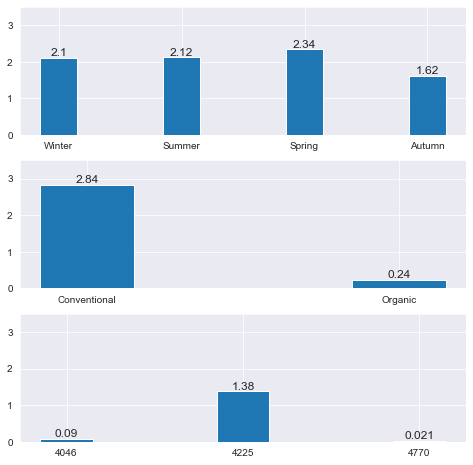

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
d = ['Winter', 'Summer', 'Spring', 'Autumn']
d1 = np.arange(len(d))
ax1.bar(d1, season_revenue_ne, width = 0.3)
ax1.set_xticks(d1)
ax1.set_xticklabels(d)
ax1.set_ylim(0, 3.5)
for i in range(len(d)):
    ax1.text(x = i, y = season_revenue_ne[i], s = season_revenue_ne[i], ha='center', va='bottom', fontsize=12)

e = ['Conventional', 'Organic']
e1 = np.arange(len(e))
ax2.bar(e1, type_revenue_ne, width = 0.3)
ax2.set_xticks(e1)
ax2.set_xticklabels(e)
for i in range(len(e)):
    ax2.text(x = i, y = type_revenue_ne[i], s = type_revenue_ne[i], ha='center', va='bottom', fontsize=12)

f = ['4046', '4225', '4770']
f1 = np.arange(len(f))
ax3.bar(c1, grade_revenue_ne, width = 0.3)
ax3.set_xticks(f1)
ax3.set_xticklabels(f)
for i in range(len(f)):
    ax3.text(x = i, y = grade_revenue_ne[i], s = grade_revenue_ne[i], ha='center', va='bottom', fontsize=12)

plt.savefig("northeast.png")

### Score for Northeast

In [56]:
season_revenue_ne_arr = np.array(season_revenue_ne)
ne_season_score = round((score1 * season_revenue_ne_arr).sum(), 2)

type_revenue_ne_arr = np.array(type_revenue_ne)
ne_type_score = round((score2 * type_revenue_ne_arr).sum(), 2)

grade_revenue_ne_arr = np.array(grade_revenue_ne)
ne_grade_score = round((score3 * grade_revenue_ne_arr).sum(), 2)

ne_score = round(ne_season_score + ne_type_score + ne_grade_score, 2)
ne_score

29.08

## West

In [57]:
def west_season(season):
    is_season = west_data.loc[:, 'month'].isin(season)
    new = west_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ west_area, 2)
    return new1

In [58]:
west_revenue_4046 = round((west_data['average_price'] * west_data['4046']).mean()/west_area, 2)
west_revenue_4225 = round((west_data['average_price'] * west_data['4225']).mean()/west_area, 2)
west_revenue_4770 = round((west_data['average_price'] * west_data['4770']).mean()/west_area, 3)

In [59]:
def west_type(typ):
    is_typ = west_data.loc[:, 'type'] == typ
    new = west_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/west_area, 2)
    return new1

In [60]:
conventional_revenue_west = west_type('conventional')
organic_revenue_west = west_type('organic')

In [61]:
type_revenue_west = [conventional_revenue_west, organic_revenue_west]
season_revenue_west = [west_season(winter), west_season(summer), west_season(spring), west_season(autumn)]
grade_revenue_west = [west_revenue_4046, west_revenue_4225, west_revenue_4770]

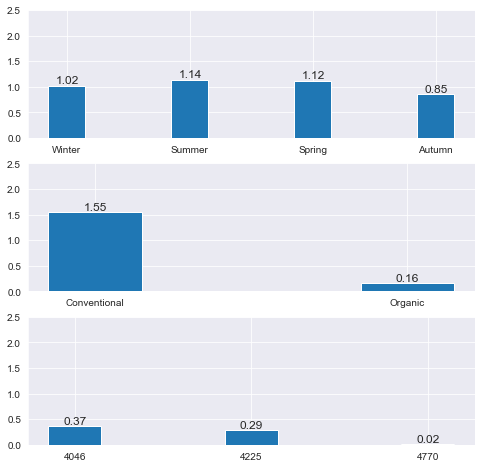

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
g = ['Winter', 'Summer', 'Spring', 'Autumn']
g1 = np.arange(len(g))
ax1.bar(g1, season_revenue_west, width = 0.3)
ax1.set_xticks(g1)
ax1.set_xticklabels(g)
ax1.set_ylim(0, 2.5)
for i in range(len(g)):
    ax1.text(x = i, y = season_revenue_west[i], s = season_revenue_west[i], ha='center', va='bottom', fontsize=12)
    
h = ['Conventional', 'Organic']
h1 = np.arange(len(h))
ax2.bar(h1, type_revenue_west, width = 0.3)
ax2.set_xticks(h1)
ax2.set_xticklabels(h)
for i in range(len(h)):
    ax2.text(x = i, y = type_revenue_west[i], s = type_revenue_west[i], ha='center', va='bottom', fontsize=12)

i = ['4046', '4225', '4770']
i1 = np.arange(len(i))
ax3.bar(i1, grade_revenue_west, width = 0.3)
ax3.set_xticks(i1)
ax3.set_xticklabels(i)
for i in range(len(i)):
    ax3.text(x = i, y = grade_revenue_west[i], s = grade_revenue_west[i], ha='center', va='bottom', fontsize=12)

#plt.savefig("west.png")

### Score for West

In [63]:
season_revenue_west_arr = np.array(season_revenue_west)
west_season_score = round((score1 * season_revenue_west_arr).sum(), 2)

type_revenue_west_arr = np.array(type_revenue_west)
west_type_score = round((score2 * type_revenue_west_arr).sum(), 2)

grade_revenue_west_arr = np.array(grade_revenue_west)
west_grade_score = round((score3 * grade_revenue_west_arr).sum(), 2)

west_score = round(west_season_score + west_type_score + west_grade_score, 2)
west_score

15.14

## Midsouth

In [64]:
def ms_season(season):
    is_season = ms_data.loc[:, 'month'].isin(season)
    new = ms_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ ms_area, 2)
    return new1

In [65]:
ms_revenue_4046 = round((ms_data['average_price'] * ms_data['4046']).mean()/ms_area, 2)
ms_revenue_4225 = round((ms_data['average_price'] * ms_data['4225']).mean()/ms_area, 2)
ms_revenue_4770 = round((ms_data['average_price'] * ms_data['4770']).mean()/ms_area, 3)

In [66]:
def ms_type(typ):
    is_typ = ms_data.loc[:, 'type'] == typ
    new = ms_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/ms_area, 2)
    return new1

In [67]:
conventional_revenue_ms = ms_type('conventional')
organic_revenue_ms = ms_type('organic')

In [68]:
type_revenue_ms = [conventional_revenue_ms, organic_revenue_ms]
season_revenue_ms = [ms_season(winter), ms_season(summer), ms_season(spring), ms_season(autumn)]
grade_revenue_ms = [ms_revenue_4046, ms_revenue_4225, ms_revenue_4770]

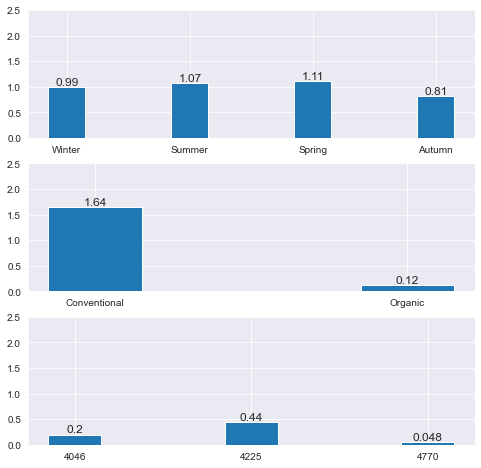

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
j = ['Winter', 'Summer', 'Spring', 'Autumn']
j1 = np.arange(len(j))
ax1.bar(j1, season_revenue_ms, width = 0.3)
ax1.set_xticks(j1)
ax1.set_xticklabels(j)
ax1.set_ylim(0, 2.5)
for i in range(len(j)):
    ax1.text(x = i, y = season_revenue_ms[i], s = season_revenue_ms[i], ha='center', va='bottom', fontsize=12)

k = ['Conventional', 'Organic']
k1 = np.arange(len(k))
ax2.bar(k1, type_revenue_ms, width = 0.3)
ax2.set_xticks(k1)
ax2.set_xticklabels(k)
for i in range(len(k)):
    ax2.text(x = i, y = type_revenue_ms[i], s = type_revenue_ms[i], ha='center', va='bottom', fontsize=12)

l = ['4046', '4225', '4770']
l1 = np.arange(len(l))
ax3.bar(l1, grade_revenue_ms, width = 0.3)
ax3.set_xticks(l1)
ax3.set_xticklabels(l)
for i in range(len(l)):
    ax3.text(x = i, y = grade_revenue_ms[i], s = grade_revenue_ms[i], ha='center', va='bottom', fontsize=12)

# plt.savefig("midsouth.png")

### Score for Midsouth

In [70]:
season_revenue_ms_arr = np.array(season_revenue_ms)
ms_season_score = round((score1 * season_revenue_ms_arr).sum(), 2)

type_revenue_ms_arr = np.array(type_revenue_ms)
ms_type_score = round((score2 * type_revenue_ms_arr).sum(), 2)

grade_revenue_ms_arr = np.array(grade_revenue_ms)
ms_grade_score = round((score3 * grade_revenue_ms_arr).sum(), 2)

ms_score = round(ms_season_score + ms_type_score + ms_grade_score, 2)
ms_score

14.82

## California

In [71]:
def cali_season(season):
    is_season = cali_data.loc[:, 'month'].isin(season)
    new = cali_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ cali_area, 2)
    return new1

In [72]:
cali_revenue_4046 = round((cali_data['average_price'] * cali_data['4046']).mean()/cali_area, 2)
cali_revenue_4225 = round((cali_data['average_price'] * cali_data['4225']).mean()/cali_area, 2)
cali_revenue_4770 = round((cali_data['average_price'] * cali_data['4770']).mean()/cali_area, 3)

In [73]:
def cali_type(typ):
    is_typ = cali_data.loc[:, 'type'] == typ
    new = cali_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/cali_area, 2)
    return new1

In [74]:
conventional_revenue_cali = cali_type('conventional')
organic_revenue_cali = cali_type('organic')

In [75]:
type_revenue_cali = [conventional_revenue_cali, organic_revenue_cali]
season_revenue_cali = [cali_season(winter), cali_season(summer), cali_season(spring), cali_season(autumn)]
grade_revenue_cali = [cali_revenue_4046, cali_revenue_4225, cali_revenue_4770]

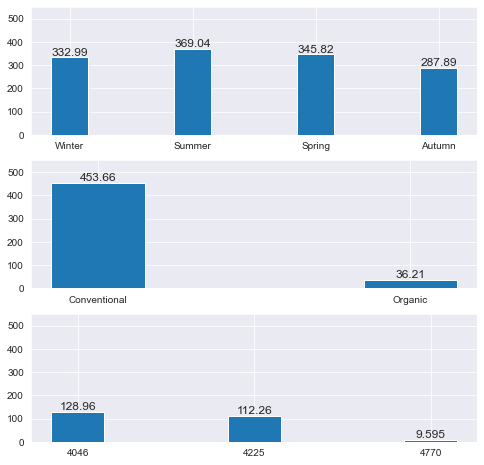

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
m = ['Winter', 'Summer', 'Spring', 'Autumn']
m1 = np.arange(len(m))
ax1.bar(m1, season_revenue_cali, width = 0.3)
ax1.set_xticks(m1)
ax1.set_xticklabels(m)
ax1.set_ylim(0, 550)
for i in range(len(m)):
    ax1.text(x = i, y = season_revenue_cali[i], s = season_revenue_cali[i], ha='center', va='bottom', fontsize=12)

n = ['Conventional', 'Organic']
n1 = np.arange(len(n))
ax2.bar(n1, type_revenue_cali, width = 0.3)
ax2.set_xticks(n1)
ax2.set_xticklabels(n)
for i in range(len(n)):
    ax2.text(x = i, y = type_revenue_cali[i], s = type_revenue_cali[i], ha='center', va='bottom', fontsize=12)

o = ['4046', '4225', '4770']
o1 = np.arange(len(o))
ax3.bar(o1, grade_revenue_cali, width = 0.3)
ax3.set_xticks(o1)
ax3.set_xticklabels(o)
for i in range(len(o)):
    ax3.text(x = i, y = grade_revenue_cali[i], s = grade_revenue_cali[i], ha='center', va='bottom', fontsize=12)
    
#plt.savefig("california.png")

### Score for California

In [77]:
season_revenue_cali_arr = np.array(season_revenue_cali)
cali_season_score = round((score1 * season_revenue_cali_arr).sum(), 2)

type_revenue_cali_arr = np.array(type_revenue_cali)
cali_type_score = round((score2 * type_revenue_cali_arr).sum(), 2)

grade_revenue_cali_arr = np.array(grade_revenue_cali)
cali_grade_score = round((score3 * grade_revenue_cali_arr).sum(), 2)

cali_score = round(cali_season_score + cali_type_score + cali_grade_score, 2)
cali_score

4786.76

## Great Lakes

In [78]:
def gl_season(season):
    is_season = gl_data.loc[:, 'month'].isin(season)
    new = gl_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ gl_area, 2)
    return new1

In [79]:
gl_revenue_4046 = round((gl_data['average_price'] * gl_data['4046']).mean()/gl_area, 2)
gl_revenue_4225 = round((gl_data['average_price'] * gl_data['4225']).mean()/gl_area, 2)
gl_revenue_4770 = round((gl_data['average_price'] * gl_data['4770']).mean()/gl_area, 3)

In [80]:
def gl_type(typ):
    is_typ = gl_data.loc[:, 'type'] == typ
    new = gl_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/gl_area, 2)
    return new1

In [81]:
conventional_revenue_gl = gl_type('conventional')
organic_revenue_gl = gl_type('organic')

In [82]:
type_revenue_gl = [conventional_revenue_gl, organic_revenue_gl]
season_revenue_gl = [gl_season(winter), gl_season(summer), gl_season(spring), gl_season(autumn)]
grade_revenue_gl = [gl_revenue_4046, gl_revenue_4225, gl_revenue_4770]

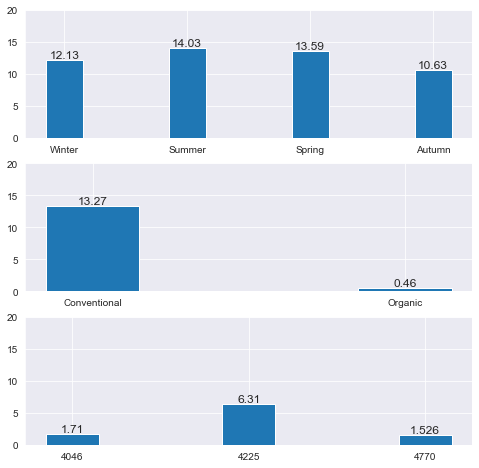

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
p = ['Winter', 'Summer', 'Spring', 'Autumn']
p1 = np.arange(len(p))
ax1.bar(p1, season_revenue_gl, width = 0.3)
ax1.set_xticks(p1)
ax1.set_xticklabels(p)
ax1.set_ylim(0, 20)
for i in range(len(p)):
    ax1.text(x = i, y = season_revenue_gl[i], s = season_revenue_gl[i], ha='center', va='bottom', fontsize=12)

q = ['Conventional', 'Organic']
q1 = np.arange(len(q))
ax2.bar(q1, type_revenue_gl, width = 0.3)
ax2.set_xticks(q1)
ax2.set_xticklabels(q)
for i in range(len(q)):
    ax2.text(x = i, y = type_revenue_gl[i], s = type_revenue_gl[i], ha='center', va='bottom', fontsize=12)

r = ['4046', '4225', '4770']
r1 = np.arange(len(r))
ax3.bar(r1, grade_revenue_gl, width = 0.3)
ax3.set_xticks(r1)
ax3.set_xticklabels(r)
for i in range(len(r)):
    ax3.text(x = i, y = grade_revenue_gl[i], s = grade_revenue_gl[i], ha='center', va='bottom', fontsize=12)
    
#plt.savefig("greatlakes.png")

### Score for Great Lakes

In [84]:
season_revenue_gl_arr = np.array(season_revenue_gl)
gl_season_score = round((score1 * season_revenue_gl_arr).sum(), 2)

type_revenue_gl_arr = np.array(type_revenue_gl)
gl_type_score = round((score2 * type_revenue_gl_arr).sum(), 2)

grade_revenue_gl_arr = np.array(grade_revenue_gl)
gl_grade_score = round((score3 * grade_revenue_gl_arr).sum(), 2)

gl_score = round(gl_season_score + gl_type_score + gl_grade_score, 2)
gl_score

172.65

## Southeast

In [85]:
def se_season(season):
    is_season = se_data.loc[:, 'month'].isin(season)
    new = se_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ se_area, 2)
    return new1

In [86]:
se_revenue_4046 = round((se_data['average_price'] * se_data['4046']).mean()/se_area, 2)
se_revenue_4225 = round((se_data['average_price'] * se_data['4225']).mean()/se_area, 2)
se_revenue_4770 = round((se_data['average_price'] * se_data['4770']).mean()/se_area, 3)

In [87]:
def se_type(typ):
    is_typ = se_data.loc[:, 'type'] == typ
    new = se_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/se_area, 2)
    return new1

In [88]:
conventional_revenue_se = se_type('conventional')
organic_revenue_se = se_type('organic')

In [89]:
type_revenue_se = [conventional_revenue_se, organic_revenue_se]
season_revenue_se = [se_season(winter), se_season(summer), se_season(spring), se_season(autumn)]
grade_revenue_se = [se_revenue_4046, se_revenue_4225, se_revenue_4770]

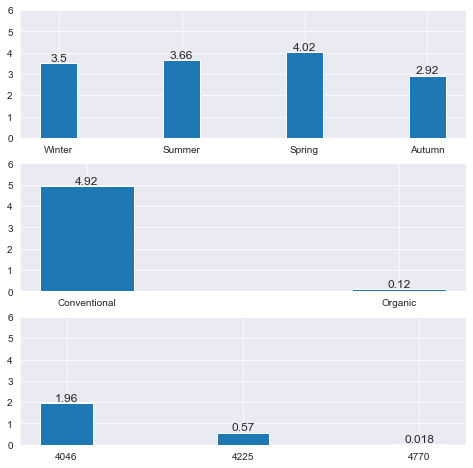

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
s = ['Winter', 'Summer', 'Spring', 'Autumn']
s1 = np.arange(len(s))
ax1.bar(s1, season_revenue_se, width = 0.3)
ax1.set_xticks(s1)
ax1.set_ylim(0, 6)
ax1.set_xticklabels(s)
for i in range(len(s)):
    ax1.text(x = i, y = season_revenue_se[i], s = season_revenue_se[i], ha='center', va='bottom', fontsize=12)

t = ['Conventional', 'Organic']
t1 = np.arange(len(t))
ax2.bar(t1, type_revenue_se, width = 0.3)
ax2.set_xticks(t1)
ax2.set_xticklabels(t)
for i in range(len(t)):
    ax2.text(x = i, y = type_revenue_se[i], s = type_revenue_se[i], ha='center', va='bottom', fontsize=12)

u = ['4046', '4225', '4770']
u1 = np.arange(len(u))
ax3.bar(u1, grade_revenue_se, width = 0.3)
ax3.set_xticks(u1)
ax3.set_xticklabels(u)
for i in range(len(u)):
    ax3.text(x = i, y = grade_revenue_se[i], s = grade_revenue_se[i], ha='center', va='bottom', fontsize=12)
    
#plt.savefig("southeast.png")

### Score for Southeast

In [91]:
season_revenue_se_arr = np.array(season_revenue_se)
se_season_score = round((score1 * season_revenue_se_arr).sum(), 2)

type_revenue_se_arr = np.array(type_revenue_se)
se_type_score = round((score2 * type_revenue_se_arr).sum(), 2)

grade_revenue_se_arr = np.array(grade_revenue_se)
se_grade_score = round((score3 * grade_revenue_se_arr).sum(), 2)

se_score = round(se_season_score + se_type_score + se_grade_score, 2)
se_score

51.48

## Southcentral

In [92]:
def sc_season(season):
    is_season = sc_data.loc[:, 'month'].isin(season)
    new = sc_data.loc[is_season]
    new1 = round(new['revenue'].mean()/ sc_area, 2)
    return new1

In [93]:
sc_revenue_4046 = round((sc_data['average_price'] * sc_data['4046']).mean()/sc_area, 2)
sc_revenue_4225 = round((sc_data['average_price'] * sc_data['4225']).mean()/sc_area, 2)
sc_revenue_4770 = round((sc_data['average_price'] * sc_data['4770']).mean()/sc_area, 3)

In [94]:
def sc_type(typ):
    is_typ = sc_data.loc[:, 'type'] == typ
    new = sc_data.loc[is_typ]
    new1 = round(new['revenue'].mean()/sc_area, 2)
    return new1

In [95]:
conventional_revenue_sc = sc_type('conventional')
organic_revenue_sc = sc_type('organic')

In [96]:
type_revenue_sc = [conventional_revenue_sc, organic_revenue_sc]
season_revenue_sc = [sc_season(winter), sc_season(summer), sc_season(spring), sc_season(autumn)]
grade_revenue_sc = [sc_revenue_4046, sc_revenue_4225, sc_revenue_4770]

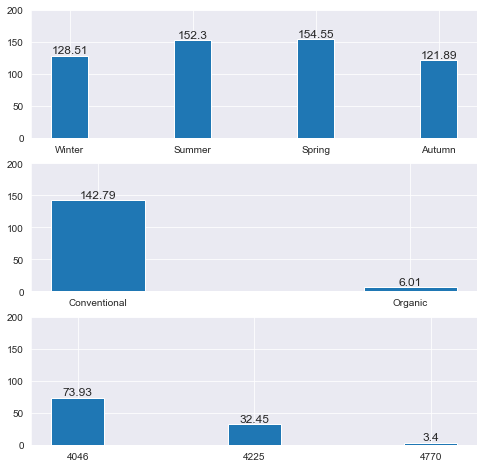

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey = True, figsize = (8,8))

sns.set_style("darkgrid")
v = ['Winter', 'Summer', 'Spring', 'Autumn']
v1 = np.arange(len(v))
ax1.bar(g1, season_revenue_sc, width = 0.3)
ax1.set_xticks(v1)
ax1.set_xticklabels(v)
ax1.set_ylim(0, 200)
for i in range(len(v)):
    ax1.text(x = i, y = season_revenue_sc[i], s = season_revenue_sc[i], ha='center', va='bottom', fontsize=12)
    
w = ['Conventional', 'Organic']
w1 = np.arange(len(w))
ax2.bar(w1, type_revenue_sc, width = 0.3)
ax2.set_xticks(w1)
ax2.set_xticklabels(w)
for i in range(len(w)):
    ax2.text(x = i, y = type_revenue_sc[i], s = type_revenue_sc[i], ha='center', va='bottom', fontsize=12)

x = ['4046', '4225', '4770']
x1 = np.arange(len(x))
ax3.bar(x1, grade_revenue_sc, width = 0.3)
ax3.set_xticks(x1)
ax3.set_xticklabels(x)
for i in range(len(x)):
    ax3.text(x = i, y = grade_revenue_sc[i], s = grade_revenue_sc[i], ha='center', va='bottom', fontsize=12)
    
#plt.savefig("southcentral.png")

### Score for Southcentral

In [98]:
season_revenue_sc_arr = np.array(season_revenue_sc)
sc_season_score = round((score1 * season_revenue_sc_arr).sum(), 2)

type_revenue_sc_arr = np.array(type_revenue_sc)
sc_type_score = round((score2 * type_revenue_sc_arr).sum(), 2)

grade_revenue_sc_arr = np.array(grade_revenue_sc)
sc_grade_score = round((score3 * grade_revenue_sc_arr).sum(), 2)

sc_score = round(sc_season_score + sc_type_score + sc_grade_score, 2)
sc_score

1936.11

## Pie Chart for Scores

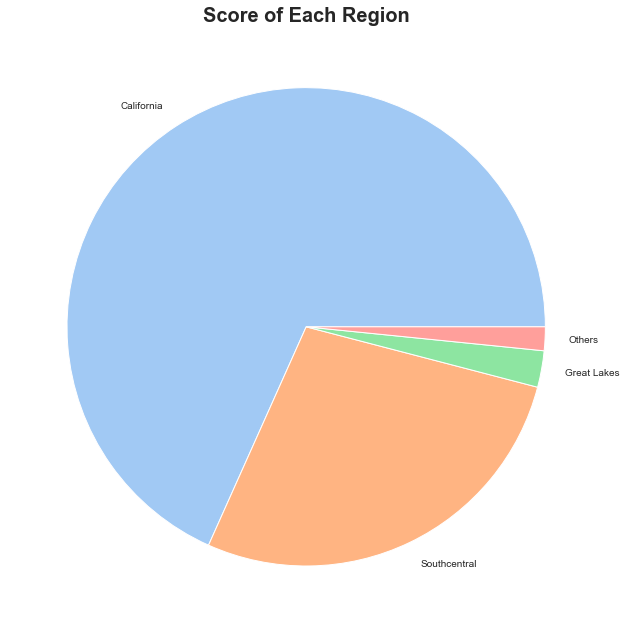

In [99]:
data_dict = {'Region': ['Plains', 'Northeast', 'West', 'Midsouth', 'California', 'Great Lakes', 'Southeast', 'Southcentral'], 'Scores': [plains_score, ne_score, west_score, ms_score, cali_score, gl_score, se_score, sc_score]}

scores = pd.DataFrame(data = data_dict)

scores_sorted = scores.sort_values('Scores', ascending = False)

rank = np.arange(1, 9)

scores_sorted['Rank'] = rank

scores_sorted

edited_dict = {'Region': ['California', 'Southcentral', 'Great Lakes', 'Others'], 'Scores': [cali_score, sc_score, gl_score, se_score + ne_score + west_score + ms_score + plains_score]}
edited_scores = pd.DataFrame(data = edited_dict)
legend = ['California', 'Southcentral', 'Great Lakes', 'Others']
colors = sns.color_palette('pastel')[0:4]
plt.pie(edited_scores['Scores'], labels = legend, colors = colors)
plt.title('Score of Each Region', fontsize = 20, fontweight = 'bold')
plt.show()
#plt.savefig("scores.png")

## Function to Plot Bulletgraph 

In [100]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

### Bulletgraph for Future Investment

<ipython-input-100-b04a1f5342c2>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


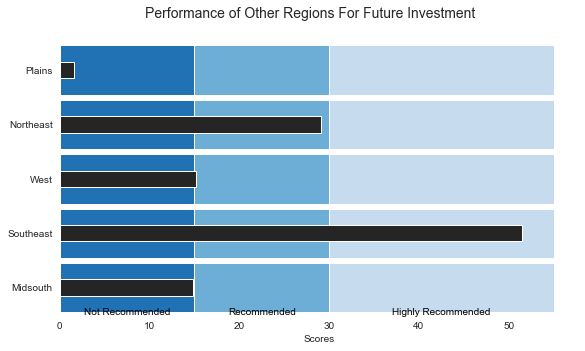

In [101]:
data_to_plot = [('Plains', plains_score),
                ('Northeast', ne_score),
                ('West', west_score),
                ('Southeast', se_score),
                ('Midsouth', ms_score)]

# palette = sns.light_palette("grey", 4, reverse = False)
palette = sns.color_palette("Blues_r", 3)
sns.set_style("white") 
bulletgraph(data_to_plot, limits=[15, 30, 55],
            labels=["Not Recommended", "Recommended", 'Highly Recommended'], size=(10,5),
            axis_label="Scores", label_color="black",
            bar_color="#252525", palette=palette,
            title="Performance of Other Regions For Future Investment")

#plt.savefig("bulletgraph1.png")